This code runs a basic digital quantum simulation of the time evolution of a single particle in 1-D space.
We follow the general framework introduced in the slides: 

1. How do we represent the position and momentum of the particle using qubits?

2. How do we initialize and measure the qubits? 

3. How do we simulate time evolution? 

4. How do we change between momentum and position bases? 

5. How do we implement diagonal unitaries? 

The first two are done naturally using the standard Qiskit operations. Time evolution can be computed using trotterization. The bases changes are done using QFT, since the fourier transform of a particle's state in the momentum basis gives us the state in the position basis. 

### Simulating Time Evolution
We will use the following Hamiltonian to simulate time evolution

$\hat{H} = \frac{\hat{p}^2}{2m} + V(\hat{x})$

which can be represented in our circuit using the unitary

$\hat{U} = \text{exp}(-i\hat{H}t / \hslash)$

Import the necessary components

In [16]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

### Example 1: Gaussian Wave Function with No Potential

#### Initialization
We use the Kitaev-Webb Algorithm to first create our initial state. 

The goal here is to create the state of the periodic discrete Gaussian, which can be expressed recursively as 
$
\newcommand{\bra}[1]{\left< #1 \right|}
\newcommand{\ket}[1]{\left| #1 \right>}
\newcommand{\bk}[2]{\left< #1 \middle| #2 \right>}
\newcommand{\bke}[3]{\left< #1 \middle| #2 \middle| #3 \right>}
$

$\ket{\xi_{\mu, \sigma, N}} = \ket{\xi_{\frac{\mu}{2}, \frac{\sigma}{2}, N-1}} \otimes \cos(\alpha) \ket{0} + \ket{\xi_{\frac{\mu-1}{2}, \frac{\sigma}{2}, N-1}} \otimes \sin(\alpha)\ket{1}$

where the angle $\alpha$ is given by 

$\alpha = \cos^{-1}\left(\sqrt{\frac{g(\mu/2, \sigma/2)}{g(\mu, \sigma)}}\right)$

In [ ]:
def KWA(mu, sigma, k, N):
    """
    Parameters:
        - mu: mean
        - sigma: sd
        - k: 
    """

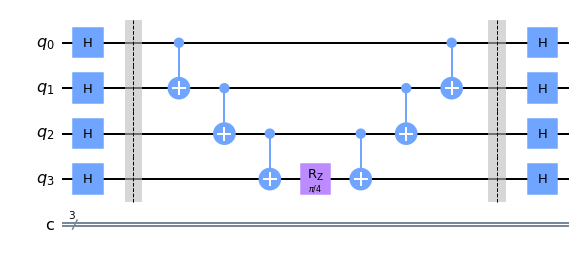

In [25]:
qc = QuantumCircuit(4, 3)
# qc.x(3)

for qubit in range(4):
    qc.h(qubit)

qc.barrier() 

qc.cnot(0, 1)
qc.cnot(1, 2)
qc.cnot(2, 3)
qc.rz(math.pi/4, 3)
qc.cnot(2,3)
qc.cnot(1,2)
qc.cnot(0,1)

qc.barrier() 

for qubit in range(4):
    qc.h(qubit)

qc.draw('mpl')


In [23]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))


Qubit State = [ 8.53553391e-01+3.53553391e-01j -2.77555756e-17+5.55111512e-17j
 -2.16489014e-17+6.24500451e-17j  9.76824214e-33-9.81307787e-18j
 -2.16489014e-17+7.85046229e-17j  6.48056559e-33-1.23259516e-32j
  2.77555756e-17-6.93889390e-18j  3.55266892e-17-5.55111512e-17j
 -7.71600526e-17+5.55111512e-17j  8.92687396e-33-1.54074396e-32j
  2.77555756e-17-6.93889390e-18j  3.14619793e-17-6.86915451e-17j
 -9.09026511e-33-1.96261557e-17j  3.55266892e-17-5.55111512e-17j
  5.55111512e-17-4.85722573e-17j  1.46446609e-01-3.53553391e-01j]


Notes: Fourier transform of the momentum operator is the position operator.